### [kaggle] 버섯 데이터 분류 실습(Decision Tree)

#### 2. 분류문제
* 독버섯(poisonous)인지 식용버섯(edible)인지 이진분류 하기
* 지도학습(Supervised Learning)의 한 분야인 분류분석

#### 1) 패키지 

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # DecisionTree 활용하기

In [58]:
pd.set_option('display.max_rows', 1000)      # 표를 출력할 때 최소 행 수
pd.set_option('display.max_columns', 1000)   # 표를 출력할 때 최소 열 수

#### 2) 데이터 가져오기

In [59]:
data = pd.read_csv("mushrooms.csv", encoding = "utf-8")

In [60]:
data.head(10)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [61]:
data.shape

(8124, 23)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [63]:
data.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

* 훗 null 값 없군

#### 3) 전처리

In [64]:
X = data.iloc[:,1:]    # 문제
y = data.iloc[:,0]     # 답

In [65]:
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


* 원핫인코딩

In [66]:
X_one_hot = pd.get_dummies(X)

In [67]:
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

In [68]:
X["habitat"].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [69]:
habitat_dic = {
    'u' : 1,
    'g' : 2,
    'm' : 3,
    'd' : 4,
    'p' : 5,
    'w' : 6,
    'l' : 7
}

In [70]:
X["habitat"].map(habitat_dic)

0       1
1       2
2       3
3       1
4       2
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

In [71]:
y.unique()

array(['p', 'e'], dtype=object)

In [72]:
y_dic = {
    'p' : 0,
    'e' : 1
}
y_label = y.map(y_dic)

* train, test split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y_label, test_size = 0.3, random_state = 42)

#### 4) 모델링

* DecisionTree Classification

In [74]:
tree_model = DecisionTreeClassifier()    # 결정트리 객체

In [75]:
tree_model.fit(X_train, y_train)         # 훈련데이터 학습

DecisionTreeClassifier()

In [76]:
tree_model.score(X_test, y_test)
print("Tree Test Accuarcy : {}%".format(round(tree_model.score(X_test, y_test) * 100, 2)))

Tree Test Accuarcy : 100.0%


* Random Forest Classification

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
print("rf Test Accuarcy : {}%".format(round(rf.score(X_test, y_test) * 100, 2)))

rf Test Accuarcy : 100.0%


* Logistic Regression Classification

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr = LogisticRegression(solver = "lbfgs")

In [82]:
lr.fit(X_train, y_train)

LogisticRegression()

In [83]:
print("lr Test Accuarcy : {}%".format(round(lr.score(X_test, y_test) * 100, 2)))

lr Test Accuarcy : 100.0%


* KNN Classification

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
best_Kvalue = 0
best_score = 0

for i in range(1, 10) :
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    if knn.score(X_test, y_test) > best_score :
        best_score = knn.score(X_test, y_test)
        best_Kvalue = i

In [88]:
print("Best KNN values : {} knn Test Accuracy : {}%".format(best_Kvalue, round(best_score*100,2)))

Best KNN values : 1 knn Test Accuracy : 100.0%


* SVM Classification

In [89]:
from sklearn.svm import SVC

In [90]:
svm = SVC(random_state = 42, gamma = "auto")
svm.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

In [91]:
print("svm Test Accuarcy : {}%".format(round(svm.score(X_test, y_test) * 100, 2)))

svm Test Accuarcy : 99.88%


* Naive Bayes Classification

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [94]:
print("nb Test Accuarcy : {}%".format(round(nb.score(X_test, y_test) * 100, 2)))

nb Test Accuarcy : 96.43%


#### 5) 시각화 패키지

In [21]:
!pip install graphviz

In [95]:
from sklearn.tree import export_graphviz

export_graphviz(tree_model, out_file = "tree.dot",
               class_names = ["독성", "식용"],
               feature_names = X_one_hot.columns,
               impurity = False,
               filled = True )

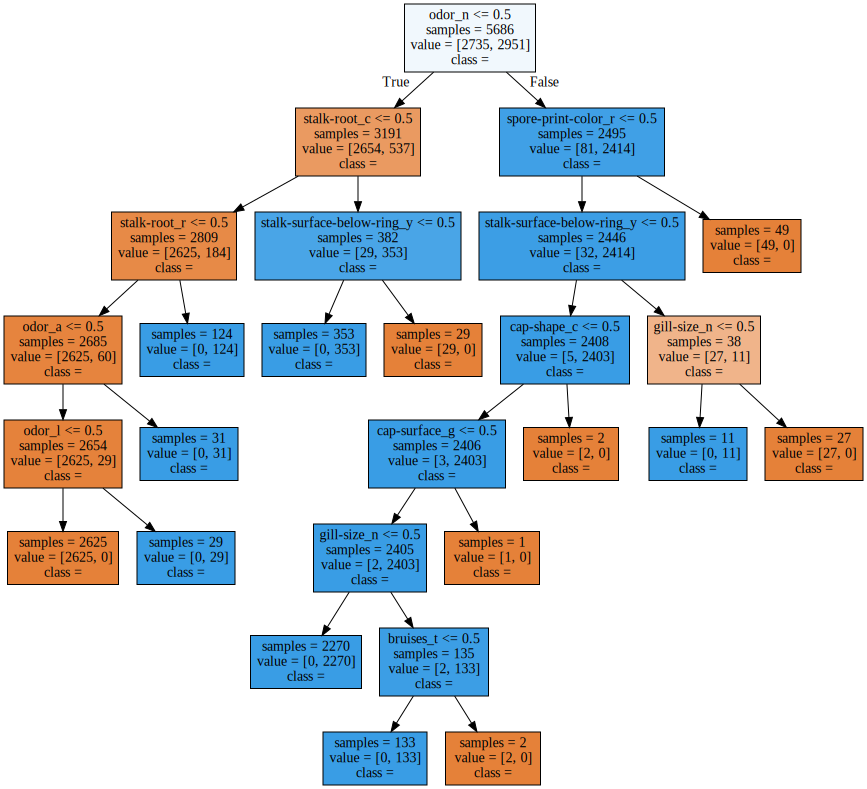

In [96]:
import graphviz


with open("tree.dot", encoding = "UTF8") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

#### 6) 과대적합제어

* max_depth, max_leaf_nodes, min_samples_leaf (리프노드 되기위한 최소 샘플데이터 수)
* max_features : 최적의 분할을 위해 고려할 최대 특성 개수
* min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수 (default : 2)
* 작게 설정할 수록 분할 노드가 많아져 과대적합 가능성 증가

In [97]:
tree_model2 = DecisionTreeClassifier(max_depth = 3,
                                    max_leaf_nodes = 4,
                                    min_samples_leaf = 4 )
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=4)

In [98]:
export_graphviz(tree_model2, out_file = "tree2.dot",
               class_names = ["독성", "식용"],
               feature_names = X_one_hot.columns,
               impurity = False,
               filled = True )

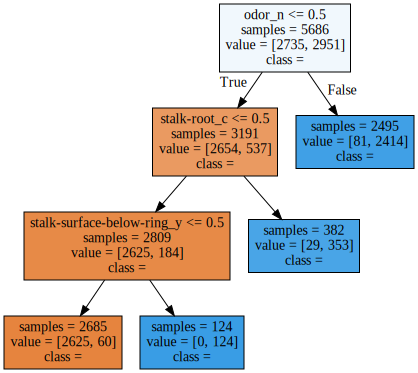

In [99]:
with open("tree2.dot", encoding = "UTF8") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

#### 7) 특성 선택

* tree 모델 특성 중요도

In [34]:
fe = tree_model.feature_importances_
fe

array([0.00000000e+00, 1.40431892e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.03035334e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.38812375e-03, 2.11181279e-02, 0.00000000e+00,
       0.00000000e+00, 2.02072262e-02, 0.00000000e+00, 6.30137472e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.97023176e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.74634554e-01, 0.00000000e+00, 7.98113371e-02,
      

In [35]:
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [36]:
im_df = pd.DataFrame(fe, index = X_one_hot.columns)
im_df

,0
cap-shape_b,0.000000
cap-shape_c,0.001404
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
cap-surface_f,0.000000
cap-surface_g,0.000703
cap-surface_s,0.000000
cap-surface_y,0.000000
